In [212]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

from data import data as dta

In [213]:
def pathMaker(model, optim, epochs,size,boolean):
    return "model%swithOptimoo%s-epochs%s-batch-size%s-relational-batch%s.csv" % (model, optim, epochs, size,boolean)

In [214]:
def latext(model, batch, results):
    return \
        "\\begin{table}[h!]" + "\n    " + \
        "\\begin{footnotesize}" + "\n    " + \
        "\\begin{center}" + "\n    " + \
        "\\begin{tabular}{l|cc:cc:cc}" + "\n    " + \
        "\\toprule" + "\n    " + \
        "Dataset               &   SGD           & SGD \\& \\tecnameAbrv & Adagrad & Adagrad \\& \\tecnameAbrv & Adam        & Adam \\& \\tecnameAbrv \\\\"+ "\n    " + \
        "\\midrule" + "\n"  + \
        results  + "\n    " + \
        "\\bottomrule"  + "\n    " + \
        "\\end{tabular}" + "\n    " + \
        "\\caption{Results with " + str(model) + " and batch of " + str(batch) + "}" + "\n    " + \
        "\\label{tab:results" + str(model).upper() +str(batch)+ "}" + "\n    " + \
        "\\end{center}" + "\n    " + \
        "\\end{footnotesize}" + "\n" + \
        "\\end{table}"


In [215]:
results = {}
models = dta.models # ["mlp", "resnet"]
optims = dta.optims # ["SGD","adagrad", "adam"]
bools = ["False", "True"]
sizes = dta.batch_sizes # ["1", "8", "32", "128"]


dirAbrv = {
                "Adult_Income":    "ACI         ", 
                "compas":          "compas      ", 
                "Dont_Get_Kicked": "DGK         ", 
                "Forest_Cover":    "Forest Cover", 
                "KDD99":           "KDD99       ",
                "Usedcarcatalog": "Used Cars   "}

curve = dict()
for directory in dirAbrv.keys():
    curve[directory] = dict()
    for model in models:
        curve[directory][model] = dict()
        for optim in optims:
            curve[directory][model][optim] = dict()
            for b in bools:
                curve[directory][model][optim][b] = dict()
    

# print(optims)
for size in sizes:
    results[size] = dict()
    # print("\nsize: " + size)
    for model in models:
        results[size][model] = dict()
        # print("\nmodel: " + model)
        res = ""
        for dir in os.listdir("results"):
            if dir in dirAbrv.keys():
                if not(".png"  in dir):
                    results[size][model][dir] = dict()
                    path = "results/" + dir
                    files = os.listdir(path)
                    losses = {}
                    printing = "    \\textbf{" + dirAbrv[dir] + "} & "
                    for optim in optims:
                        results[size][model][dir][optim] = dict()
                        txts = {}
                        maxis = {}
                        minis = {}
                        for b in bools:
                            results[size][model][dir][optim][b] = dict()
                            p = pathMaker(model,optim,dta.epochs,size,b)
                            if p in files:
                                df = pd.read_csv(path + "/" + p)

                                name = "noRB"
                                if b == "True":
                                    name = "RB"
                                losses["%s with %s" % (optim, name)] = df.test

                                std = np.std(df.test)
                                meanTest = np.mean(df.test)
                                
                                results[size][model][dir][optim][b]["mu"]  = meanTest
                                results[size][model][dir][optim][b]["std"] = std
                                results[size][model][dir][optim][b]["data"] = list(df.test)

                                curve[dir][model][optim][b][size] = meanTest
                                # print("model:%s optim:%s rb:%s: %2.2f +- %2.2f" % (model, optim, b, meanTest, std))

                                _maxi = meanTest + std
                                _mini = meanTest - std - 0.01

                                txt = "%2.2f $\pm$ %2.2f" % (meanTest, std)
                                txts[str(b)] = txt
                                maxis[str(b)] = _maxi
                                minis[str(b)] = _mini
                        for b in bools:
                            if p in files:

                                txt = txts[str(b)]
                                if maxis[str(b)] < minis[str(not b)]:
                                    txt = "\\textbf{" + txt + "}"
                                printing = printing + txt+ " & "
                                # print(txt)
                    printing = printing[:-2] + "\\\\"
                    printing = printing.replace("0.00", "0.01")
                    res = res +  printing + " \n"
                    # print(printing)
        ltxt = latext(model, size, res)

        #print(ltxt)
        #print()
        #print()
                    

In [216]:
results

def mu(size, model, d, optim, b):
    return results[size][model][d][optim][b]["mu"]

def std(size, model, d, optim, b):
    return results[size][model][d][optim][b]["std"]

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [218]:
dirAbrv.keys()

dict_keys(['Adult_Income', 'compas', 'Dont_Get_Kicked', 'Forest_Cover', 'KDD99', 'Usedcarcatalog'])

In [225]:
params = {
  'axes.labelsize': 16,
  'font.size': 18,
  'legend.fontsize': 12,
  'xtick.labelsize': 20,
  'ytick.labelsize': 20,
  'text.usetex': True,
  'figure.figsize': [8, 6],
  'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb}',
   }
plt.rcParams.update(params)

32
resnet
[0.1225, 0.1225, 0.1235, 0.1225, 0.1235, 0.123, 0.123, 0.1225, 0.1225, 0.123]
[0.571, 0.6859999999999999, 0.247, 0.506, 0.1594999999999999, 0.2339999999999999, 0.516, 0.525, 0.7344999999999999, 0.2945]


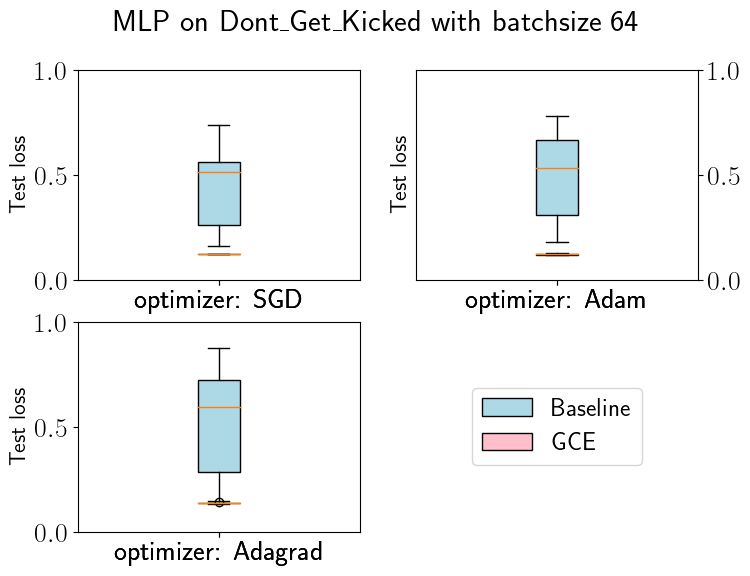

64
resnet
[0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999, 0.1149999999999999]
[0.4355, 0.483, 0.285, 0.596, 0.4479999999999999, 0.393, 0.601, 0.4165, 0.611, 0.2485]


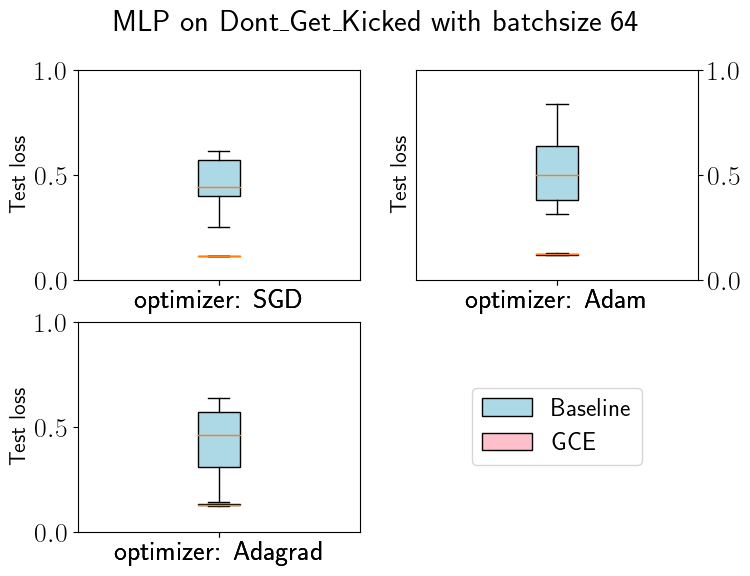

128
resnet
[0.1135, 0.1149999999999999, 0.1135, 0.1135, 0.1135, 0.1139999999999999, 0.1139999999999999, 0.1135, 0.1135, 0.1135]
[0.593, 0.5465, 0.7945, 0.7295, 0.1644999999999999, 0.6025, 0.4589999999999999, 0.4569999999999999, 0.5155000000000001, 0.1875]


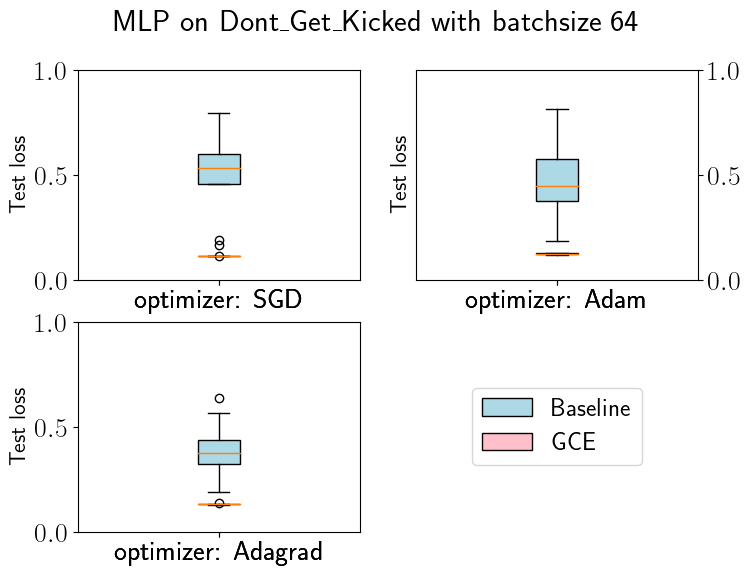

256
resnet
[0.1149999999999999, 0.1165, 0.1165, 0.1159999999999999, 0.1125, 0.1139999999999999, 0.1135, 0.1129999999999999, 0.1149999999999999, 0.1149999999999999]
[0.3994999999999999, 0.8029999999999999, 0.497, 0.791, 0.763, 0.606, 0.2835, 0.652, 0.531, 0.5375]


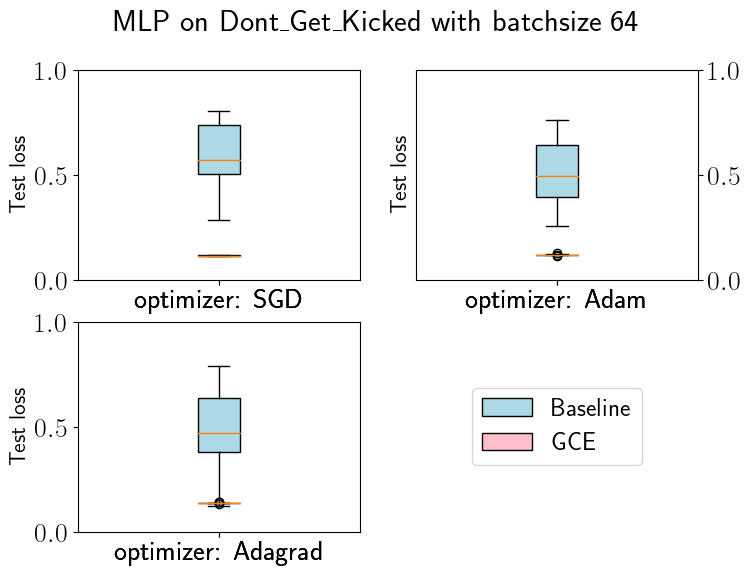

512
resnet
[0.1175, 0.127, 0.1119999999999999, 0.128, 0.156, 0.148, 0.1185, 0.126, 0.136, 0.129]
[0.1755, 0.6455, 0.2794999999999999, 0.618, 0.8235, 0.724, 0.1989999999999999, 0.5375, 0.623, 0.552]


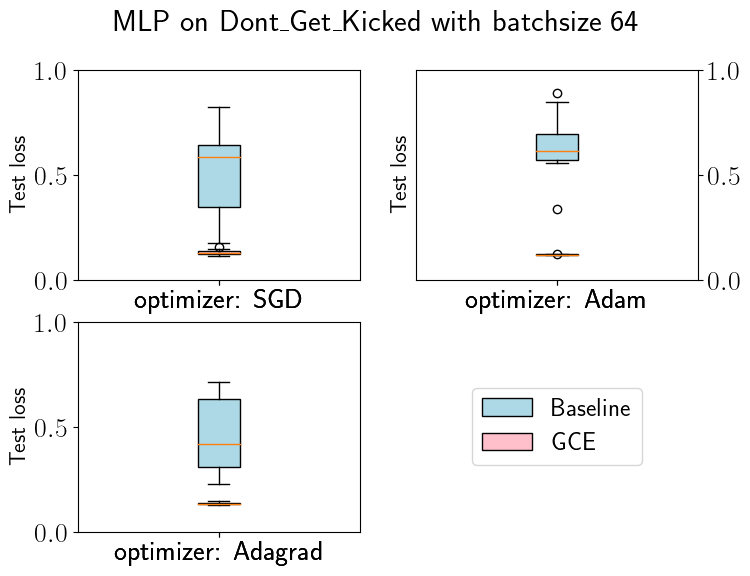

1024
resnet
[0.2315, 0.171, 0.242, 0.2159999999999999, 0.1755, 0.1534999999999999, 0.141, 0.147, 0.141, 0.2125]
[0.696, 0.3844999999999999, 0.746, 0.6905, 0.4785, 0.3665, 0.2099999999999999, 0.3249999999999999, 0.1915, 0.6925]


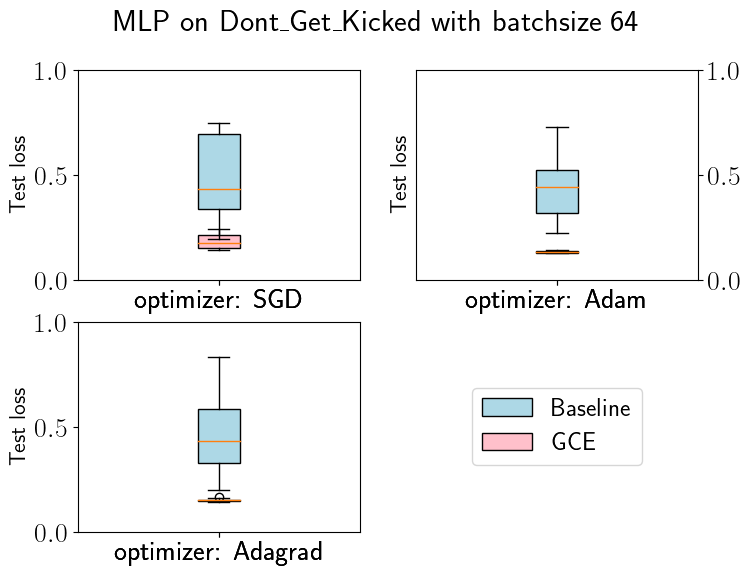

In [238]:
my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}


log = False
for size in sizes:#sizes:
    print(size)
    for model in ["resnet"]:#models:
        print(model)
        for d in  ['Dont_Get_Kicked']:
            
            
            #size = 32
            #model = "mlp"
            #d = "KDD99"
            data_dict = {}
            optim = "SGD"
            for b in ["True", "False"]:
                print(results[size][model][d][optim][b]["data"])
                data_dict[b] = results[size][model][d][optim][b]["data"]
                #data_dict[b] = [x + np.random.normal(0,0.1) for x in data_dict[b]]


            fig, ax = plt.subplots(2, 2)
            ax1 = ax[0][0]
            ax2 = ax[0][1]
            ax3 = ax[1][0]
            ax4 = ax[1][1]

            if log:
                ax1.set_yscale('log')
            bplot1 = ax1.boxplot(data_dict.values(), positions=[0 for _ in range(2)], patch_artist=True,)
            ax1.set_xticklabels(["optimizer: SGD" for _ in range(2)])
            ax1.set_ylabel('Test loss')
            ax1.set_ylim(0,1)


            #d = "Adult_Income"
            data_dict = {}
            optim = "adam"
            for b in ["True", "False"]:
                data_dict[b] = results[size][model][d][optim][b]["data"]

            #ax2 = plt.subplot(222)
            if log:
                ax2.set_yscale('log')
            bplot2 = ax2.boxplot(data_dict.values(), positions=[0 for _ in range(2)], patch_artist=True,)
            ax2.set_xticklabels(["optimizer: Adam" for _ in range(2)])
            ax2.set_ylabel('Test loss')
            ax2.set_ylim(0,1)
            ax2.yaxis.tick_right()


            #d = "Adult_Income"
            data_dict = {}
            optim = "adagrad"
            for b in ["True", "False"]:
                data_dict[b] = results[size][model][d][optim][b]["data"]

            #ax3 = plt.subplot(223)
            if log:
                ax3.set_yscale('log')
            bplot3 = ax3.boxplot(data_dict.values(), positions=[0 for _ in range(2)], patch_artist=True,)
            ax3.set_xticklabels(["optimizer: Adagrad" for _ in range(2)])
            ax3.set_ylabel('Test loss')
            ax3.set_ylim(0,1)


            colors = ['pink', 'lightblue', 'lightgreen']

            for bplot in [bplot1, bplot2, bplot3]:
                for patch, color in zip(bplot['boxes'], colors):
                    patch.set_facecolor(color)


            #ax4 = plt.subplot(224)
            ax4.legend([bplot1["boxes"][1], bplot1["boxes"][0]], ['Baseline', 'GCE'], loc='center', fontsize=18)
            ax4.axis('off')
            #fig.suptitle(d, fontsize=30)
            fig.suptitle("MLP on " + d + " with batchsize 64", fontsize=22)

            # plt.legend()
            #plt.savefig("GCE-revision-addition.eps", format='eps')
            plt.show()
            plt.close()



In [197]:
results

{32: {'mlp': {'Adult_Income': {'SGD': {'False': {'mu': 0.4841499999999999,
      'std': 0.24077967626026917,
      'data': [0.2425,
       0.611,
       0.7575000000000001,
       0.2425,
       0.7575000000000001,
       0.2634999999999999,
       0.743,
       0.739,
       0.2425,
       0.2425]},
     'True': {'mu': 0.24345,
      'std': 0.0026874709300753062,
      'data': [0.2425,
       0.2425,
       0.243,
       0.2425,
       0.2514999999999999,
       0.2425,
       0.2425,
       0.2425,
       0.2425,
       0.2425]}},
    'adam': {'False': {'mu': 0.47879999999999995,
      'std': 0.23166842685182634,
      'data': [0.3075,
       0.2584999999999999,
       0.3015,
       0.7575000000000001,
       0.406,
       0.7575000000000001,
       0.2425,
       0.7575000000000001,
       0.2425,
       0.757]},
     'True': {'mu': 0.20729999999999996,
      'std': 0.004087786687193941,
      'data': [0.2009999999999999,
       0.2079999999999999,
       0.2025,
       0.2095,
   

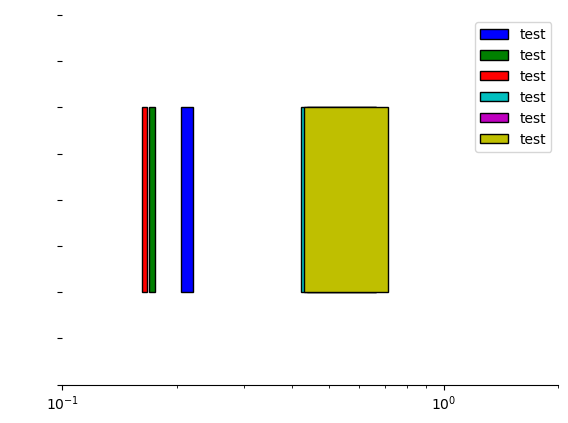

In [120]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_rectangles(rectangles):
    
    fig, ax = plt.subplots()
    # ax.set_aspect('equal')
    plt.yticks(color='w')
    ax.spines[['right', 'top', 'left']].set_visible(False)
    coolors = list(mcolors.BASE_COLORS.keys())
    c = 0
    for rect in rectangles:
        x, y, width, height = rect
        rectangle = Rectangle((x, y), width, height, edgecolor='black',facecolor=coolors[c],label="test")
        ax.add_patch(rectangle)
        c += 1

    plt.xlim(0.1, 2.0)  # Set the x-axis limits as needed
    plt.xscale('log')
    plt.ylim(-1, 1)  # Set the y-axis limits as needed
    # plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()

# Example usage
rectangles = [
    (1, -0.5, 2, 1),
    (4, -0.5, 3, 1),
    (2, -0.5, 1, 1),
    (6, -0.5, 2, 1)
]

rectangles = []
size = 64
for model in ["resnet"]:
    for d in ["Adult_Income"]:
        for b in ['True', 'False']:
            for optim in optims:
                m = mu(size, model, d, optim, b)
                s = std(size, model, d, optim, b)
                rectangles.append((m-s, -0.5, 2 * s, 1))

display_rectangles(rectangles)


In [80]:
results

{32: {'mlp': {'Adult_Income': {'SGD': {'False': {'mu': 0.4841499999999999,
      'std': 0.24077967626026917},
     'True': {'mu': 0.24345, 'std': 0.0026874709300753062}},
    'adam': {'False': {'mu': 0.47879999999999995, 'std': 0.23166842685182634},
     'True': {'mu': 0.20729999999999996, 'std': 0.004087786687193941}},
    'adagrad': {'False': {'mu': 0.6023000000000002, 'std': 0.2355482116255609},
     'True': {'mu': 0.4625, 'std': 0.22039339826773396}}},
   'Dont_Get_Kicked': {'SGD': {'False': {'mu': 0.5568500000000001,
      'std': 0.35081412813625396},
     'True': {'mu': 0.11850000000000002, 'std': 2.7755575615628914e-17}},
    'adam': {'False': {'mu': 0.5985, 'std': 0.3514796580173595},
     'True': {'mu': 0.11860000000000001, 'std': 0.00030000000000000035}},
    'adagrad': {'False': {'mu': 0.4105499999999999, 'std': 0.3593196661748421},
     'True': {'mu': 0.3484, 'std': 0.3490081517672617}}},
   'Forest_Cover': {'SGD': {'False': {'mu': 1.9830177545547485,
      'std': 0.0220749

In [63]:
s

0.0026874709300753062

In [36]:
def plot_curve(c, dataset, model, size=32):
    fontfamily = "serif"
    
    d = c[dataset][model]
    x = [i for i in range(0, len(dta.batch_sizes))] # np.log(dta.batch_sizes)
    c = 0
    
    fig = plt.figure(1, figsize=(12,8))
    ax = fig.add_subplot(111, facecolor='lightgrey')
    # plt.figure(figsize=(12,8))
    linewidth = 3
    
    # plt.ylim(0, 1.05)
    for optim in d.keys():
        color = list(mcolors.BASE_COLORS.keys())[c]#dta.colors[c]
        o = d[optim]
        oTrue = o["True"]
        oFalse = o["False"]
        yTrue = [oTrue[_x] for _x in dta.batch_sizes]
        yFalse = [oFalse[_x] for _x in dta.batch_sizes]
        plt.plot(x, yTrue, '--',color=color, label=optim.upper() + " & GCE",linewidth=linewidth)
        plt.plot(x, yFalse, color=color, label=optim.upper(), linewidth=linewidth)
        
        c += 1
    plt.xticks(x, dta.batch_sizes)
    plt.legend(loc=4, fontsize=int(size/2))
    if dataset == "Adult_Income":
        fontsize = 20
        plt.ylabel("error rate", fontsize=fontsize-6, fontfamily=fontfamily)
        plt.xlabel("batch", fontsize=fontsize, fontfamily=fontfamily)
        plt.grid(color="palegoldenrod")
        plt.savefig(dataset +  model +  '.pdf')  
        
    plt.show()
    plt.close()

Adult_Income
mlp


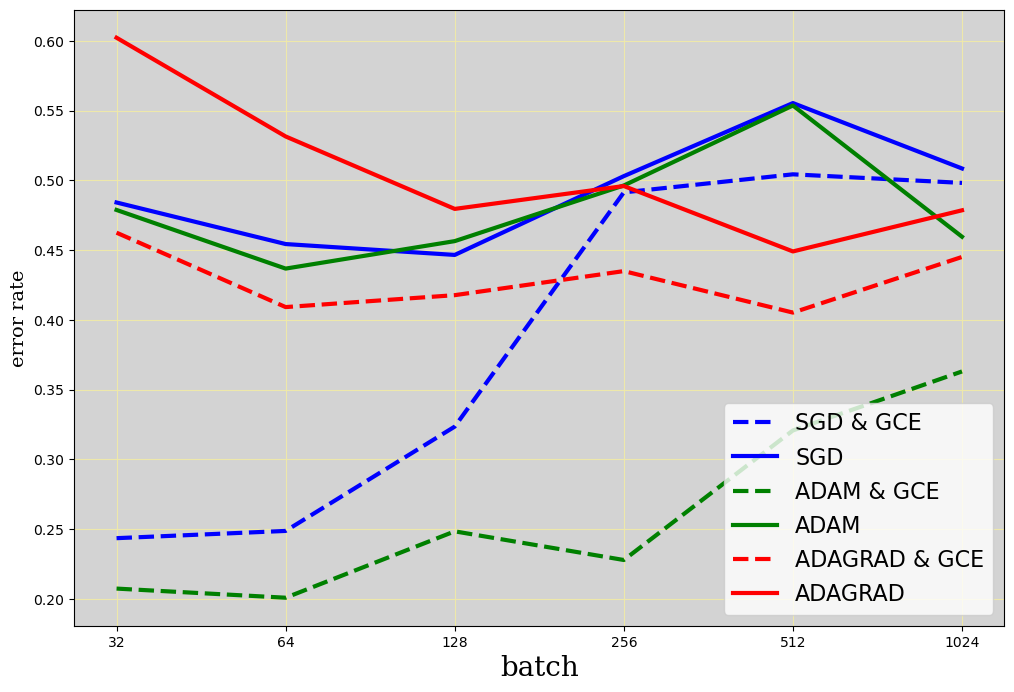

Adult_Income
resnet


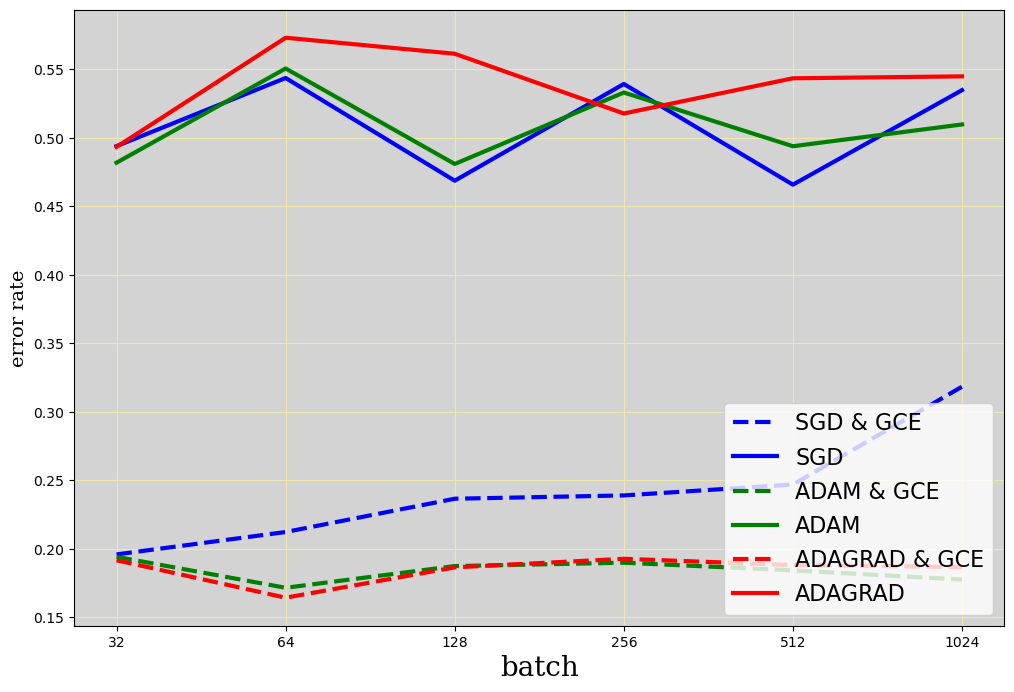

compas
mlp
compas
resnet
Dont_Get_Kicked
mlp


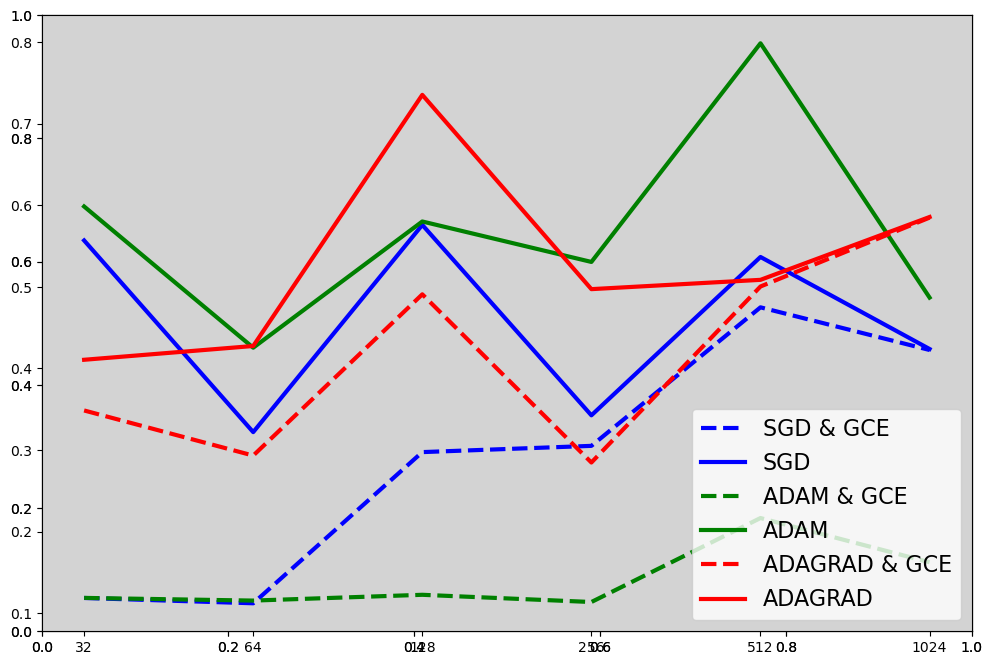

Dont_Get_Kicked
resnet


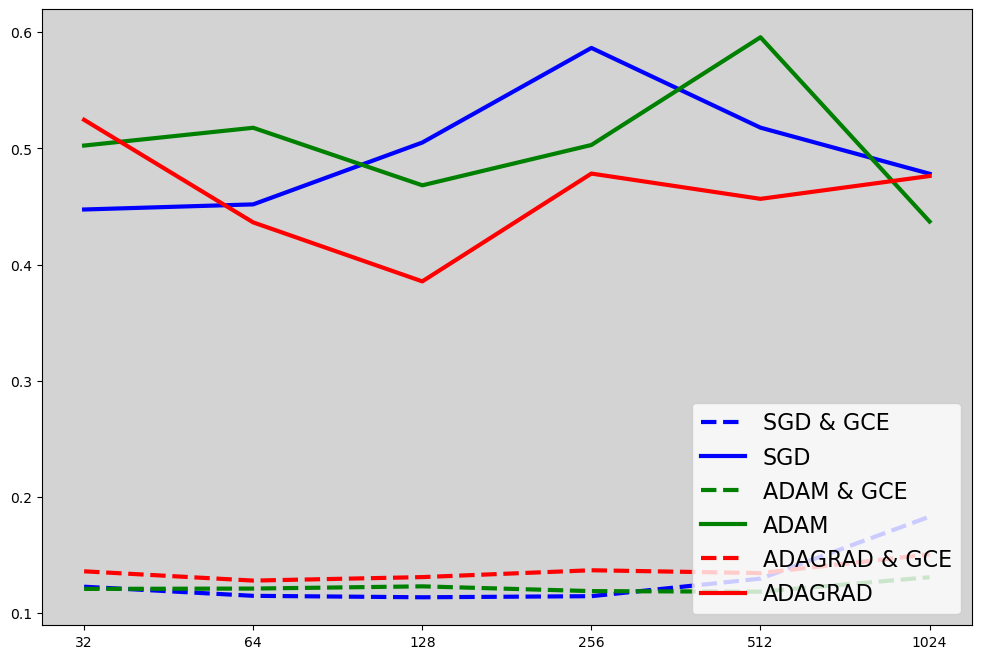

Forest_Cover
mlp


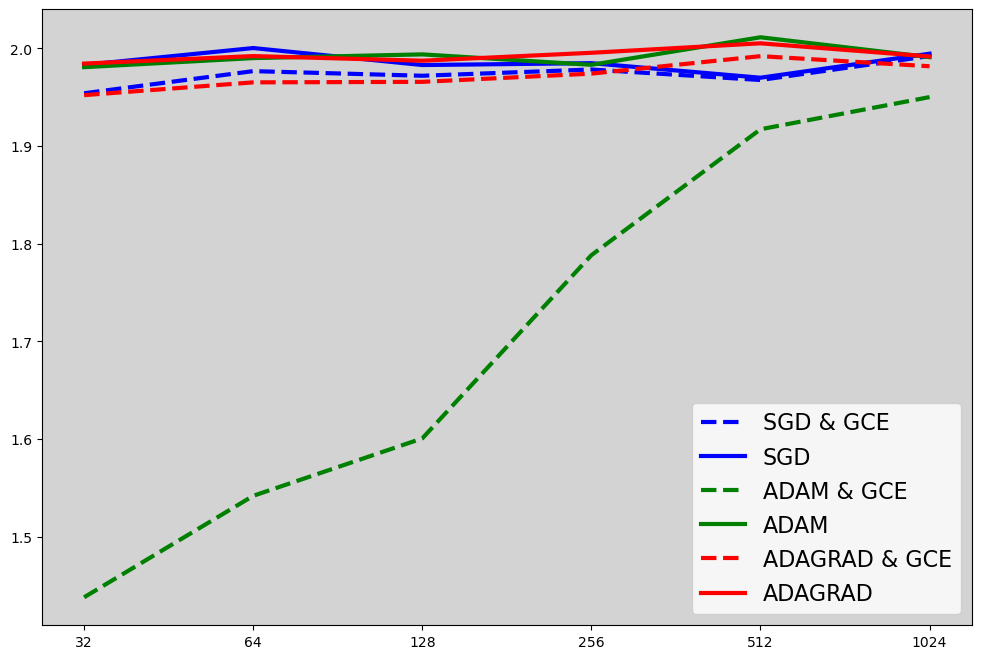

Forest_Cover
resnet


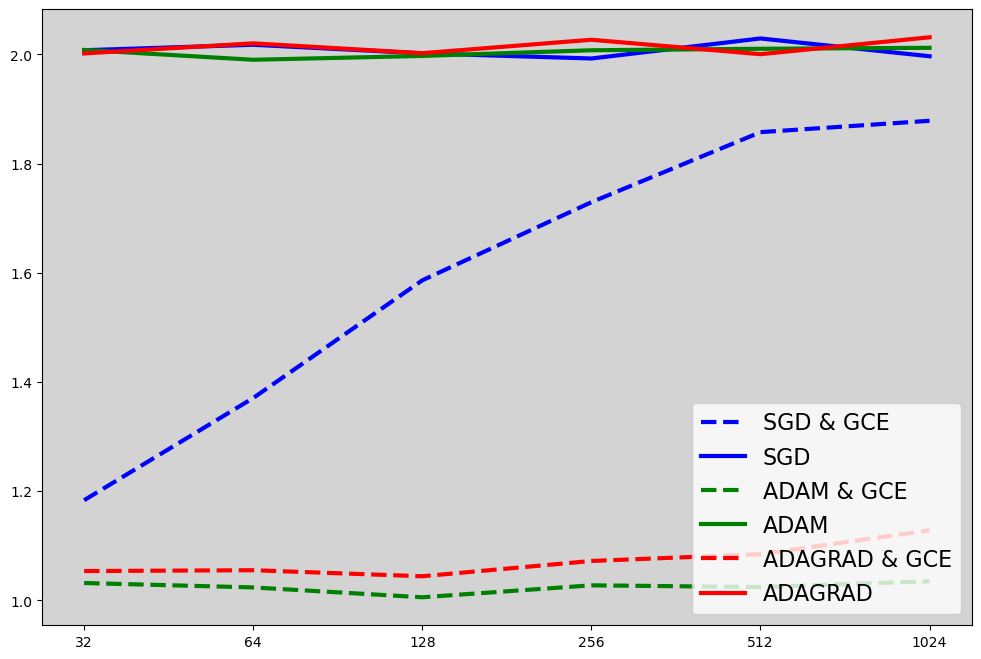

KDD99
mlp


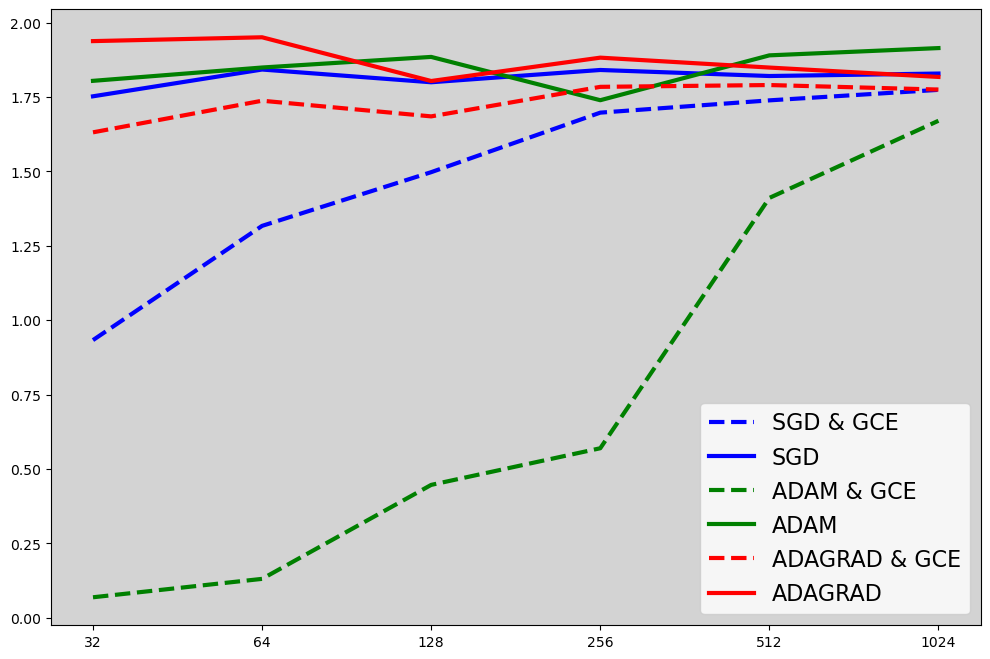

KDD99
resnet


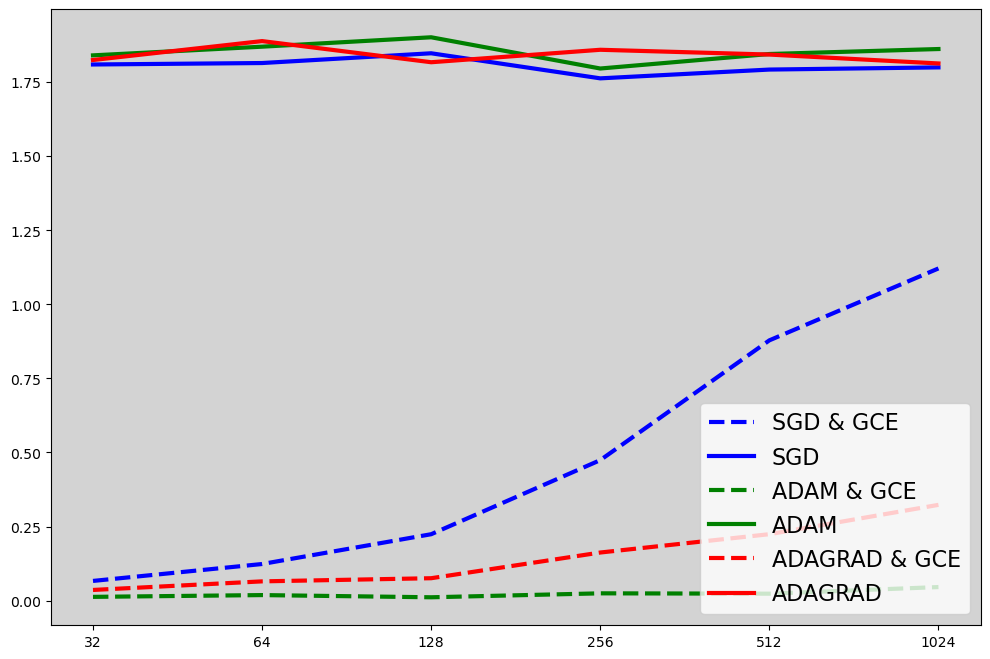

Usedcarcatalog
mlp
Usedcarcatalog
resnet


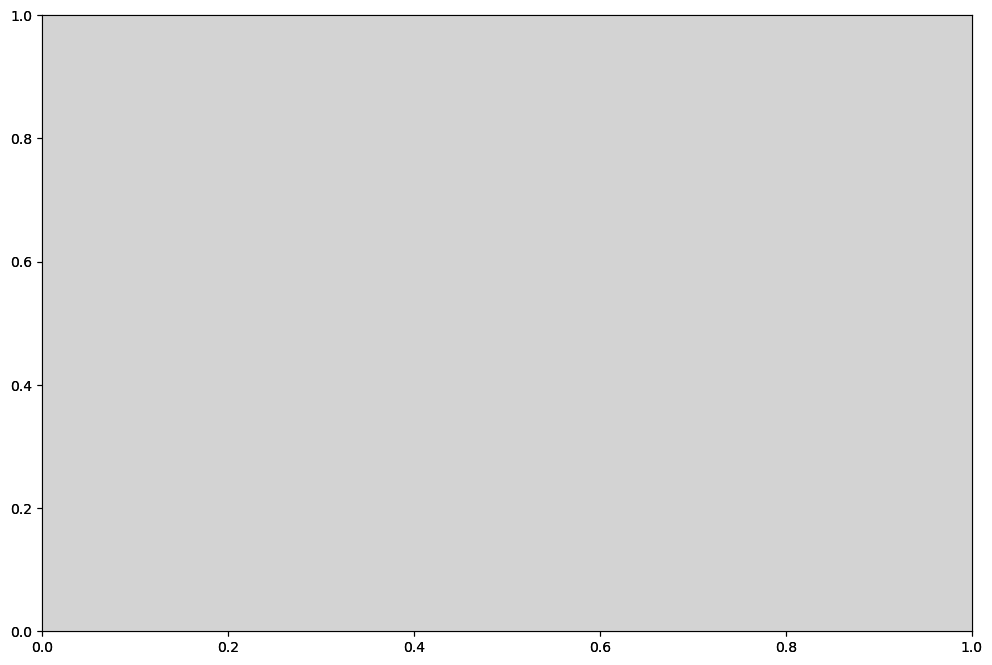

In [29]:
for dataset in curve.keys():
    for model in dta.models:
        print(dataset)
        print(model)
        try:
            plot_curve(curve, dataset, model)
        except:
            pass

In [30]:


curve["compas"]["mlp"]["SGD"]["True"]

{}

In [31]:
dta.colors

['bisque', 'pink', 'lightblue', 'silver', 'bisque', 'fushia', 'crimson']

In [32]:
list(mcolors.BASE_COLORS.keys())

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [33]:
results

{'Adult_Income': {}, 'Dont_Get_Kicked': {}, 'Forest_Cover': {}, 'KDD99': {}}